## Exploring Cleaning and Wrangling Part 02
### this is starting from new data which includes games played info Sourced from SullyGnome.com


In [1]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

In [2]:
# imports
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install plotly

!{sys.executable} -m pip install collections
!{sys.executable} -m pip install xgboost

from collections import namedtuple
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [3]:
### This works but I should create a function that reads in the data.  

In [4]:
# twitch_df = pd.read_csv("twitch_clean_data_Kelly.csv", parse_dates=["Date"])
# twitch_df.head()

In [5]:
pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', 130)

In [6]:
def load_twitch_data():
    cols = list(pd.read_csv("twitch_clean_data_Kelly02.csv", nrows=1))
    df = pd.read_csv("twitch_clean_data_Kelly02.csv", parse_dates=["Date"],
                    usecols = [i for i in cols if i !="Unnamed: 71"])
    return df

In [7]:
twitch_original_df = load_twitch_data()


In [8]:
twitch_original_df.head()

,Date,player_mode,DST,ONI,Go_Deeper,Chatting,Stardew,DD,Ori_Blind_Forest,Manual_Samuel,Divinity_II,Drawful2,Running_Rifles,Cat_Quest,Cuphead,Hotline_Miami,Terraria,DS,Getting_Over_It,Golf_w_Friends,Escapists2,Human_Fall_Flat,Castle_Crashers,Bridge_Constructor_Portal,Choice_Chamber,KTANE,Doki_Doki,GeoGuessr,Jackbox,We_Were_Here_Too,Stick_Fight,Hacktag,Into_Breach,Portia,Act_it_OutXL,Little Nightmares,Dauntless,Domina,ToS,Surviving_Mars,Way_Out,Move_Die,Hollow_Knight,Spy_Party,Monster_Prom,Shantae_Pirates_Curse,Subnautica,Use_Your_Words,Witch_It,Im_Bread,Agario,Moonlighter,Ultimate_Chicken_Horse,Spelunky,Overcooked2,Graveyard_Keeper,DBD,Amnesia_Dark_Descent,Layers_of_Fear,Borderlands2,Rapture_Rejects,Undertale,Into_the_Breach,Marbles,Tabletop_Sim,2Point_Hospital,Yokus_Island,Slime_Rancher,Secret_Neighbor,Hotline_Miami.1,Cook_Serve_Delicious2,Time_Portia,Griftlands,Stream_Raiders,Yomawari,Darkwood,7D2D,Dream_Daddy,ARK,Stream_Racer,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
0,2017-06-13,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1,0.033333,12.66666667,66.66666667
1,2017-06-14,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2,0.066667,10,34.61538462
2,2017-06-15,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.45,40,3,0,0,2,0.0,1,8,89,20,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,3,0.100000,40,300
3,2017-06-16,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.73,38,5,0,0,2,0.0,17,6,421,115,13,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,4,0.133333,2.923076923,38.46153846
4,2017-06-17,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.99,100,8,0,0,0,0.0,16,7,591,148,12,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,5,0.166667,8.333333333,66.66666667


In [9]:
twitch_df = twitch_original_df.copy()

### Ultimately I need to make a decision about how to split this data.

I think since her followers grow over time, I think the model should be given a random range of dates

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(twitch_df, minimal=True).to_notebook_iframe()

profile

## Wrangle - 
    Date as index 
    Create new streamDateId using David's toordinal
    replace_list = ["inf", "Unknown"]
    twitch_df.fillna(value= 0)

In [11]:
def wrangle_twitch_data02(df):
    # fill the Nans
    df = df.fillna(value= 0)
    
    # replace the unknown game values with 0
    replace_list = ["inf", "Unknown"]
    df= df.replace(to_replace=replace_list, value=0)    
    
    # as a consequence of having strings the columns where not floats.
    # correct that.
    df["user_chatting_percent"]= df["user_chatting_percent"].astype(str).astype(float)
    df["avg_message_per_viewer"]= df["avg_message_per_viewer"].astype(str).astype(float)
    
    ## Create new streamDateId using David's toordinal
    # this basically ordinally encodes the date
    df["stream_date_id"] = df["Date"].map(datetime.datetime.toordinal)
    
    # Set the date to index I think.. not sure if it's necessary...
    # df = df.set_index("Date")
    
    # Create an other_column for dimension reduction
    df["other_game"] = [0 for x in range(0, 1159)]

    # Fill in other_game column
    bottom_games_streamed=df.loc[:, "DST":"Stream_Racer"].sum().sort_values(ascending=False).tail(58).index
    bottom_games_streamed
    
    concerned_columns_df = df[bottom_games_streamed]
    other_sum = []
    for i in range(len(concerned_columns_df)):
        row = concerned_columns_df.iloc[i]
        other_sum.append(row.sum())
        
    df["other_game"] = other_sum

    # drop the bottom_games_streamed
    df = df.drop(bottom_games_streamed, axis=1)
    
    # rearrange column order
    cols = df.columns.tolist()

    cols = ['Date','stream_date_id', 'player_mode', 'DST','ONI','Chatting',
     'Stardew', 'DD','Drawful2', 'Cuphead','Terraria','Escapists2', 'Choice_Chamber',
     'Jackbox', 'Hollow_Knight','Subnautica','Use_Your_Words','Moonlighter','Graveyard_Keeper',
     'Marbles','7D2D','Dream_Daddy','ARK',"other_game",'Average Viewers','Chat Messages',
     'Chatters','Clip Views','Clips Created','Follows','Hosts and Raids Viewers (%)',
     'Live Views','Max Viewers','Minutes Watched','Minutes Streamed','Unique Viewers',
     'day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','day_of_week_5',
    'day_of_week_6','day_of_week_7','streak','activity','avg_message_per_viewer',
     'user_chatting_percent','Sub Revenue','Prime Revenue','Gifted Subs Revenue',
     'Bits Revenue','Ad Revenue','Extensions Revenue','Bounties Revenue','donations',
     'Prime Subs','Total Paid Subs','Tier 1 subs','Tier 2 subs', 'Tier 3 subs',
     'Total Gifted Subs','Gifted Tier 1 subs','Gifted Tier 2 subs', 'Gifted Tier 3 subs',
     'Total_Sub_Revenue','Total_Earnings']
    
    df =df[cols]

    # create earning_cat_target
    df["total_earn_cat"] = pd.qcut(df["Total_Earnings"], 3, labels=["not worth", "kinda worth", "def worth!"])
    
    # change these columns from cat to numerical
    df["Extensions Revenue"]= df["Extensions Revenue"].astype(str).astype(float)  
    df["Bounties Revenue"]= df["Bounties Revenue"].astype(str).astype(float)
    df["Tier 2 subs"]= df["Tier 2 subs"].astype(str).astype(float)
    df["player_mode"]= df["player_mode"].astype(str).astype(float)

    return df
    
    

In [13]:
twitch_df.head(2)

,Date,player_mode,DST,ONI,Go_Deeper,Chatting,Stardew,DD,Ori_Blind_Forest,Manual_Samuel,Divinity_II,Drawful2,Running_Rifles,Cat_Quest,Cuphead,Hotline_Miami,Terraria,DS,Getting_Over_It,Golf_w_Friends,Escapists2,Human_Fall_Flat,Castle_Crashers,Bridge_Constructor_Portal,Choice_Chamber,KTANE,Doki_Doki,GeoGuessr,Jackbox,We_Were_Here_Too,Stick_Fight,Hacktag,Into_Breach,Portia,Act_it_OutXL,Little Nightmares,Dauntless,Domina,ToS,Surviving_Mars,Way_Out,Move_Die,Hollow_Knight,Spy_Party,Monster_Prom,Shantae_Pirates_Curse,Subnautica,Use_Your_Words,Witch_It,Im_Bread,Agario,Moonlighter,Ultimate_Chicken_Horse,Spelunky,Overcooked2,Graveyard_Keeper,DBD,Amnesia_Dark_Descent,Layers_of_Fear,Borderlands2,Rapture_Rejects,Undertale,Into_the_Breach,Marbles,Tabletop_Sim,2Point_Hospital,Yokus_Island,Slime_Rancher,Secret_Neighbor,Hotline_Miami.1,Cook_Serve_Delicious2,Time_Portia,Griftlands,Stream_Raiders,Yomawari,Darkwood,7D2D,Dream_Daddy,ARK,Stream_Racer,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
0,2017-06-13,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1,0.033333,12.66666667,66.66666667
1,2017-06-14,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2,0.066667,10,34.61538462


In [12]:
twitch_df.isnull().sum()

Date                              0
player_mode                     460
DST                             839
ONI                            1151
Go_Deeper                      1156
Chatting                        995
Stardew                        1080
DD                             1132
Ori_Blind_Forest               1158
Manual_Samuel                  1158
Divinity_II                    1158
Drawful2                       1042
Running_Rifles                 1158
Cat_Quest                      1156
Cuphead                        1139
Hotline_Miami                  1158
Terraria                       1152
DS                             1158
Getting_Over_It                1155
Golf_w_Friends                 1158
Escapists2                     1153
Human_Fall_Flat                1156
Castle_Crashers                1157
Bridge_Constructor_Portal      1158
Choice_Chamber                 1148
KTANE                          1157
Doki_Doki                      1157
GeoGuessr                   

In [14]:
twitch_df = wrangle_twitch_data02(twitch_df)
twitch_df.head()

,Date,stream_date_id,player_mode,DST,ONI,Chatting,Stardew,DD,Drawful2,Cuphead,Terraria,Escapists2,Choice_Chamber,Jackbox,Hollow_Knight,Subnautica,Use_Your_Words,Moonlighter,Graveyard_Keeper,Marbles,7D2D,Dream_Daddy,ARK,other_game,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,streak,activity,avg_message_per_viewer,user_chatting_percent,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,donations,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,Total_Sub_Revenue,Total_Earnings,total_earn_cat
0,2017-06-13,736493,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0,0,0,0,0,1,0,1,0.033333,12.666667,66.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
1,2017-06-14,736494,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0,0,0,0,0,0,1,2,0.066667,10.000000,34.615385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
2,2017-06-15,736495,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.45,40,3,0,0,2,0.0,1,8,89,20,1,1,0,0,0,0,0,0,3,0.100000,40.000000,300.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
3,2017-06-16,736496,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.73,38,5,0,0,2,0.0,17,6,421,115,13,0,1,0,0,0,0,0,4,0.133333,2.923077,38.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
4,2017-06-17,736497,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.99,100,8,0,0,0,0.0,16,7,591,148,12,0,0,1,0,0,0,0,5,0.166667,8.333333,66.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth


In [15]:
twitch_df.columns


Index(['Date', 'stream_date_id', 'player_mode', 'DST', 'ONI', 'Chatting',
       'Stardew', 'DD', 'Drawful2', 'Cuphead', 'Terraria', 'Escapists2',
       'Choice_Chamber', 'Jackbox', 'Hollow_Knight', 'Subnautica',
       'Use_Your_Words', 'Moonlighter', 'Graveyard_Keeper', 'Marbles', '7D2D',
       'Dream_Daddy', 'ARK', 'other_game', 'Average Viewers', 'Chat Messages',
       'Chatters', 'Clip Views', 'Clips Created', 'Follows',
       'Hosts and Raids Viewers (%)', 'Live Views', 'Max Viewers',
       'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'Sub Revenue',
       'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue', 'Ad Revenue',
       'Extensions Revenue', 'Bounties Revenue', 'donations', 'Prime Subs',
       'Total Paid Subs', 'Tier 1 subs', 'Tier 2 subs',

In [ ]:
twitch_df.isnull().sum()

In [ ]:
twitch_df.shape

In [16]:
# This is how many times a game was streamed.  I should plot this.  
twitch_df.loc[:, "DST":"other_game"].sum().sort_values(ascending=False)

DST                 320.0
Jackbox             205.0
Chatting            164.0
other_game          122.0
Drawful2            117.0
Stardew              79.0
7D2D                 58.0
DD                   27.0
Subnautica           24.0
Hollow_Knight        21.0
Cuphead              20.0
ARK                  15.0
Graveyard_Keeper     13.0
Use_Your_Words       12.0
Choice_Chamber       11.0
Marbles               8.0
ONI                   8.0
Terraria              7.0
Escapists2            6.0
Moonlighter           6.0
Dream_Daddy           6.0
dtype: float64

In [ ]:
# turn this into a list so I can zip and turn into a df
game_columns = list(twitch_df.loc[:, "DST":"other_game"].columns)

In [ ]:
game_columns

In [ ]:
g_data = list(twitch_df.loc[:, "DST":"other_game"].sum())
g_data

In [ ]:
game_count_tuple = list(zip(game_columns, g_data))

In [ ]:
game_count_tuple

In [ ]:
game_freq_df = pd.DataFrame(game_count_tuple, columns=["Game", "Days"])

In [ ]:
game_freq_df.shape

In [ ]:
game_freq_df.set_index("Game").head(21).sort_values(by="Days").plot.barh()

In [ ]:
# I should change all other games to other.

In [ ]:
twitch_df.head(2)

In [ ]:
# create a list of columns that are not in the top 20 played games
# bottom_games_streamed=twitch_df.loc[:, "DST":"Stream_Racer"].sum().sort_values(ascending=False).tail(58).index
# bottom_games_streamed

In [ ]:
# # 
# other_sum = []
# for row, value in twitch_df.loc[:, bottom_games_streamed]: # I think problem is here
#     curr_sum =value.sum()  ## <---- I'm stuck here
#     other_sum.append(curr_sum)
# other_sum

In [ ]:
# row_list = [sum(list(x)) for x in twitch_df.loc[:, bottom_games_streamed]]

In [ ]:

# other_sum = []
# for index, row in twitch_df.loc[:, bottom_games_streamed].iterrows(): 
#     curr_sum = row.sum()
#     other_sum.append(curr_sum)
# other_sum

In [ ]:
twitch_df.isnull().sum()

In [ ]:
# concerned_columns_df = twitch_df[bottom_games_streamed]
# other_sum = []
# for i in range(len(concerned_columns_df)):
#     row = concerned_columns_df.iloc[i]
#     other_sum.append(row.sum())

In [ ]:
# bottom_games_streamed=twitch_df.loc[:, "DST":"Stream_Racer"].sum().sort_values(ascending=False).tail(58).index
# bottom_games_streamed

In [ ]:
# last one - create earnings_cat
twitch_df["Total_Earnings"].describe()

In [ ]:
plt.hist(twitch_df["Total_Earnings"], bins=200)
plt.show()

In [17]:
temp_df = twitch_df.copy()

In [ ]:
# temp_df["total_earning_cat"] = pd.qcut(twitch_df["Total_Earnings"], 3, labels=["not worth", "kinda worth", "def worth!"])
# temp_df.head(2)

In [ ]:
# plt.hist(temp_df["total_earning_cat"], bins=200)
# plt.show()

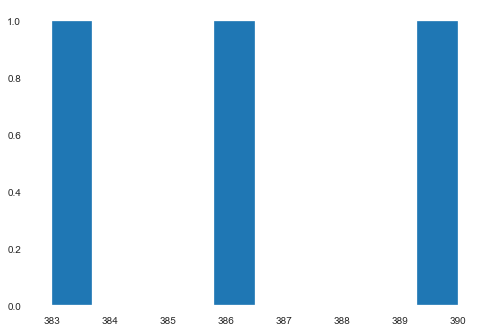

In [22]:
plt.hist(temp_df["total_earn_cat"].value_counts())
plt.show()

In [23]:
temp_df["total_earn_cat"].value_counts()


not worth      390
def worth!     386
kinda worth    383
Name: total_earn_cat, dtype: int64

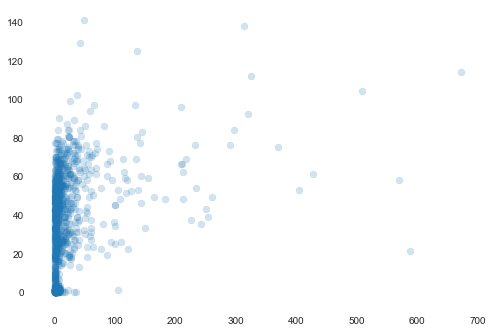

In [24]:
plt.scatter(twitch_df["Total_Earnings"],
            twitch_df["Chatters"], alpha=.2)
plt.show()

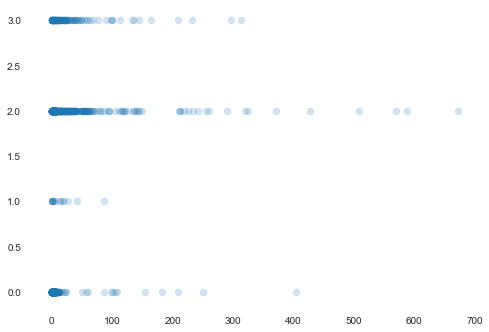

In [30]:
plt.scatter(twitch_df["Total_Earnings"],
            twitch_df["player_mode"], alpha=.2)
plt.show()

In [59]:
cross=pd.crosstab(twitch_df["Total_Earnings"], twitch_df["player_mode"])
cross.head(20)

player_mode,0.0,1.0,2.0,3.0
Total_Earnings,,,,
0.0000,182,5,47,8
0.0035,10,0,2,0
0.0070,3,0,0,0
0.0100,0,0,2,0
0.0140,2,0,0,0
0.0200,0,0,2,0
0.0300,0,0,2,0
0.0350,1,0,0,0
0.0420,1,0,0,0


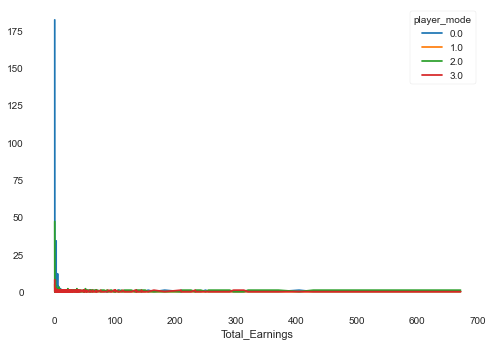

In [57]:
cross.plot();

In [31]:
## I have to do a visualizion of player_mode and mean income
cond_plm01 = twitch_df["player_mode"] == 1 
cond_plm01

0        True
1        True
2       False
3       False
4       False
        ...  
1154    False
1155    False
1156    False
1157    False
1158    False
Name: player_mode, Length: 1159, dtype: bool

In [33]:
single_df = twitch_df[cond_plm01]
single_df["Total_Earnings"].mean()

15.2802

In [34]:
cond_plm02 = twitch_df["player_mode"] == 2 
cond_plm02

0       False
1       False
2        True
3        True
4        True
        ...  
1154    False
1155    False
1156    False
1157     True
1158     True
Name: player_mode, Length: 1159, dtype: bool

In [35]:
multi_df = twitch_df[cond_plm02]
multi_df["Total_Earnings"].mean()

30.980260162601628

In [37]:
cond_plm03 = twitch_df["player_mode"] == 3 
cond_plm03

0       False
1       False
2       False
3       False
4       False
        ...  
1154    False
1155    False
1156    False
1157    False
1158    False
Name: player_mode, Length: 1159, dtype: bool

In [38]:
mixed_df = twitch_df[cond_plm03]
mixed_df["Total_Earnings"].mean()

27.399201986754964

### The mean rev for multi-player games only is highest


In [64]:
def get_confidence_interval(sample, confidence_level):
    from scipy import stats


    # in because we like some np functions 
    # make a np array for our sample
    sample_np_array = np.array(sample)

    # variables we need for the calculations are 
    # std_dev, sample size, t-statistic

    std_dev = np.std(sample_np_array, ddof=1)
    sample_size = sample_np_array.shape[0]

    #here's the new one: from scipy stats 
    # Percent Point Function (Inverse of CDF)
    # this value take ?? percent of data that  as a parameter
    # does same thing as university of I. applet
    tstat = stats.t.ppf(1 - ((1 - confidence_level) / 2), sample_size-1)

    # need the sample mean as x_bar
    x_bar = np.mean(sample_np_array)

    # I need the standard error =
    # standard deviation / squareroot of sample size
    std_err = (std_dev/np.sqrt(sample_size))

    # now I need the Margin of Error
    # which is tstat * standard error
    moe = tstat*std_err

    # then for info purposes lets return the 
    # lower and upper bounds

    lower_bound = x_bar - moe
    upper_bound = x_bar + moe

    confidence_int = namedtuple("confidence_interval", ["lower_bound", "xbar","upper_bound","moe", ])

    # return (lower_bound, x_bar, upper_bound, moe)
    return confidence_int(lower_bound, x_bar, upper_bound, moe)

In [65]:
singlepl_sample_values = get_confidence_interval(single_df["Total_Earnings"], .95)
multipl_sample_values = get_confidence_interval(multi_df["Total_Earnings"], .95)
mixedpl_sample_values = get_confidence_interval(mixed_df["Total_Earnings"], .95)

In [67]:
lightbl_color = "#4780b3"
lighto_color = "#ffb25e"
middle_color = "#fb8b24"
worse_color= "#0f4c5c"
best_color ="#8C031C"

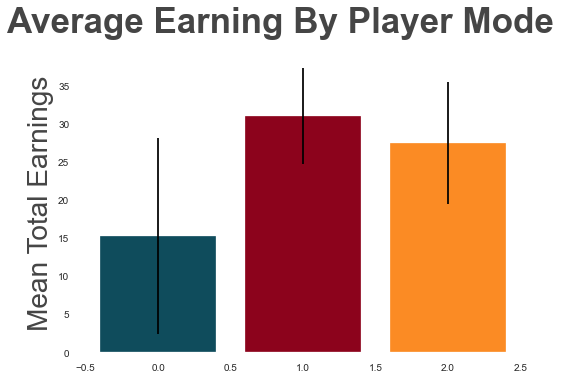

In [77]:
plt.gca()
# #  figsize=(10,10)

# plt.figure(figsize=(10,10))

# fig, ax = plt.subplots(figsize = (10,10))



# this graph I"m keeping and improving
plt.bar(0, height=singlepl_sample_values.xbar, yerr=singlepl_sample_values.moe,
        color=worse_color)
plt.bar(1, height=multipl_sample_values.xbar, yerr=multipl_sample_values.moe,
        color=best_color)
plt.bar(2, height=mixedpl_sample_values.xbar, yerr=mixedpl_sample_values.moe,
        color=middle_color)

plt.title('Average Earning By Player Mode')

# Set bg 

fig.set_facecolor("#F0F0F0")

# set graph background 

ax.set_facecolor("#F0F0F0")

# label the x and y axis


plt.ylabel("Mean Total Earnings", fontsize=28, color= "#454545")

# adjust  y ticks 
# ax.set_yticklabels(labels=[0, 200, 400, 600,800], fontsize=28, color= "#454545")

# get rid of x ticks/labels
ax.axes.xaxis.set_visible(False)

# table at bottom

# lightbl_color = "#4780b3"
# lighto_color = "#ffb25e"
# middle_color = "#fb8b24"
# worse_color= "#0f4c5c"
# dnd_color ="#8C031C"

# colors = [["#F0F0F0","#F0F0F0","#F0F0F0","#F0F0F0","#4f6b75", "#4f6b75"],
#           [ "#F0F0F0","#F0F0F0","#F0F0F0","#F0F0F0","#b36969", "#b36969"]]

# cellText=[]
# for row in ev_comparison_df["Services"]:
#   cellText.append(row)
# table = plt.table(cellText=ev_comparison_df.iloc[:,1:].values,
#                   rowLabels=ev_comparison_df["Services"],
#                   colLabels=ev_comparison_df.columns[1:],
#                   cellColours=colors, 
#                   loc='bottom')

# table.set_fontsize(25)
# table.scale(1,4)

# add title
ev_title = "Average Earning By Player Mode"
plt.title(ev_title, fontsize=35, color= "#454545", fontweight = "bold", x =.45, y=1.05)


#remove spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)



# plt.savefig('ev_sales_mu_v_hair.png')

plt.show()

<AxesSubplot:>

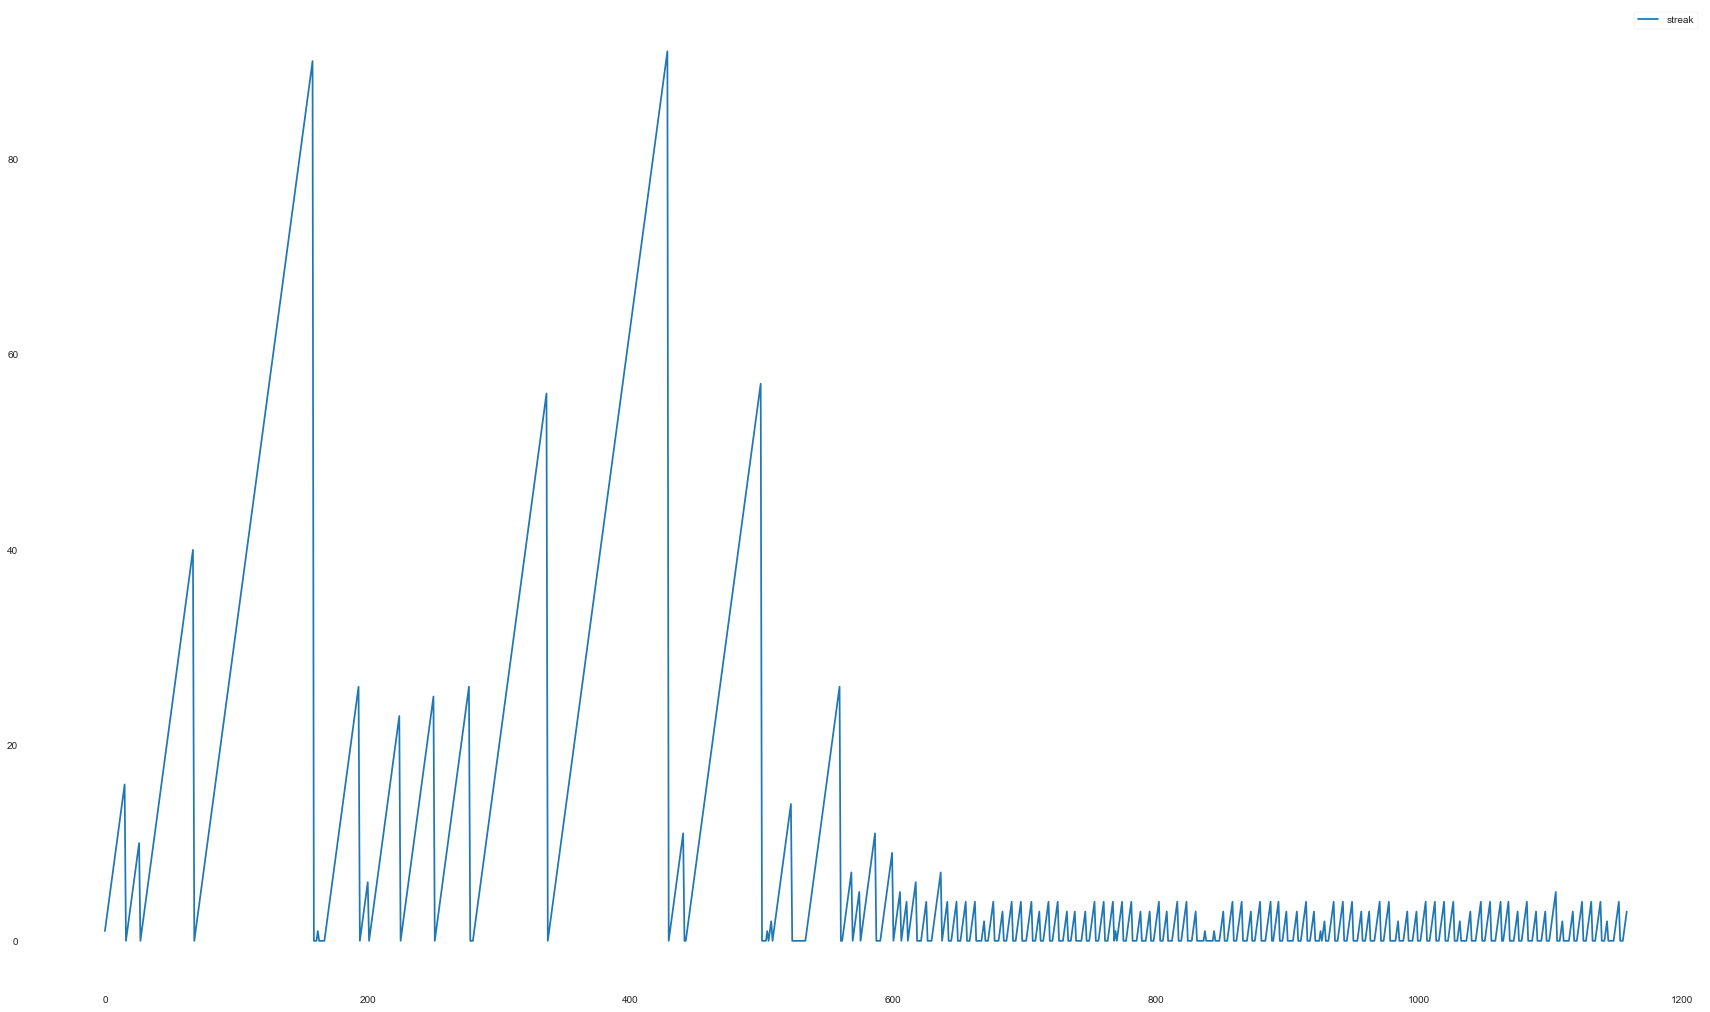

In [26]:
twitch_df.plot( y="streak", figsize =(30,18))

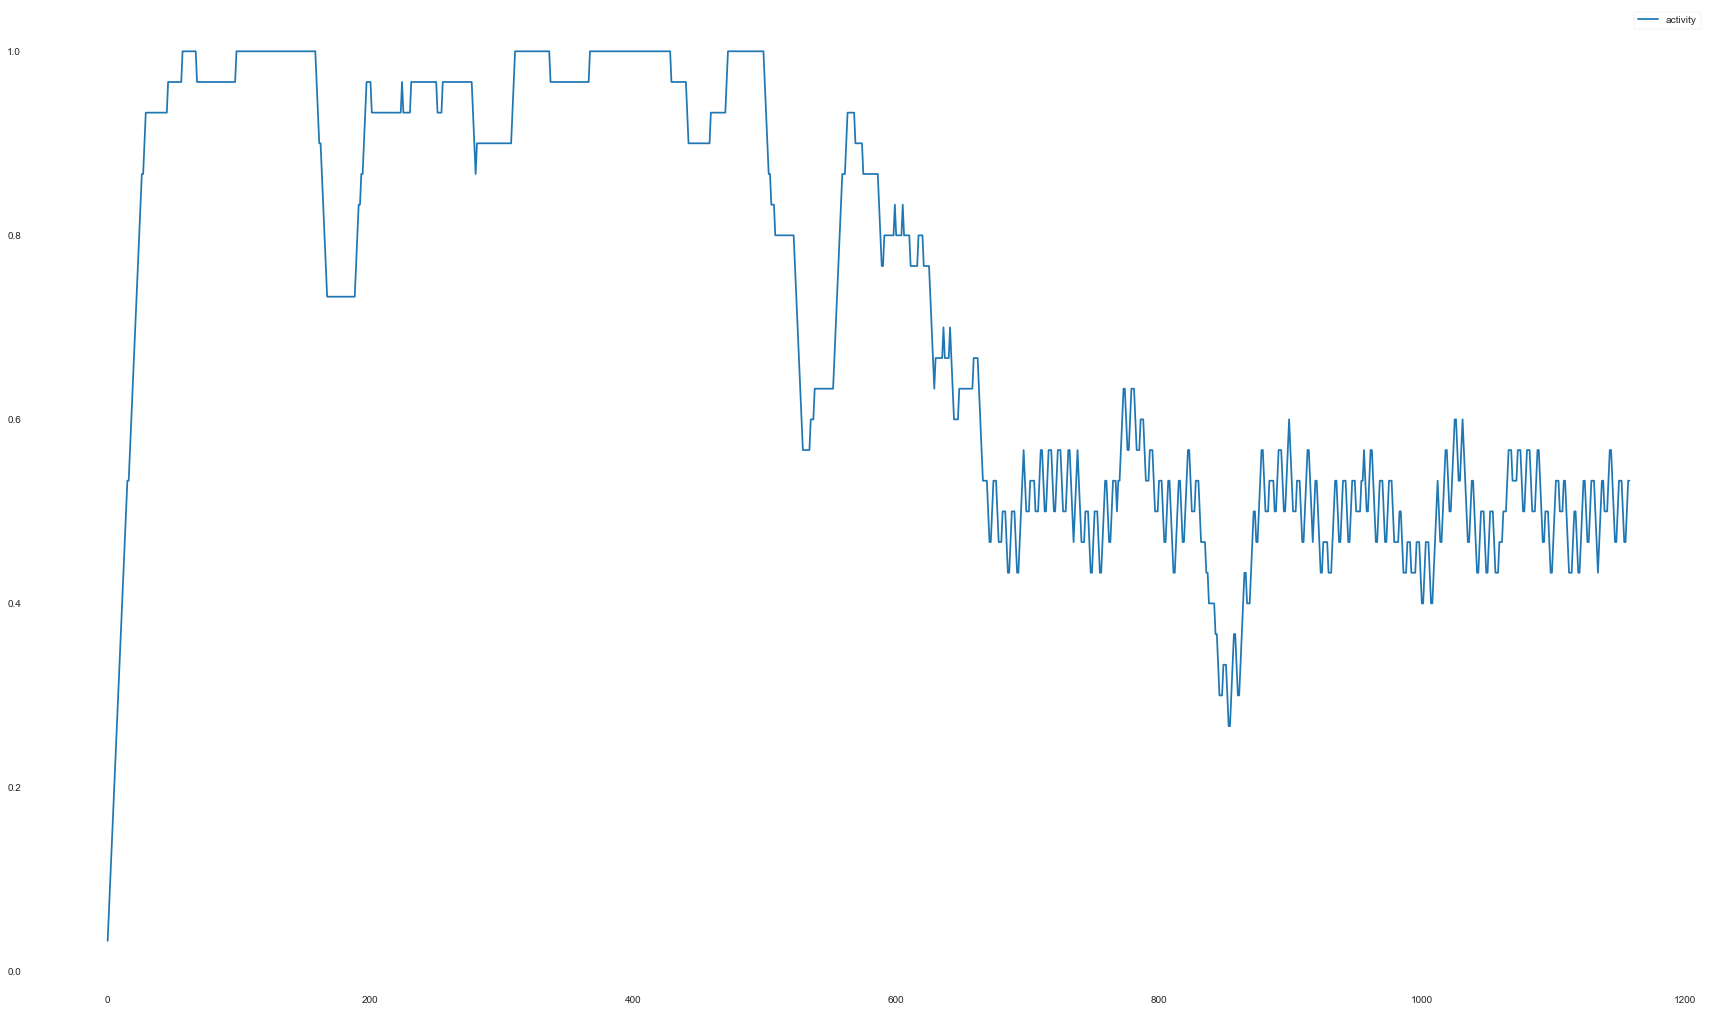

In [28]:
twitch_df.plot( y="activity", figsize =(30,18))
plt.show()

In [29]:
twitch_df["player_mode"].value_counts()

0.0    501
2.0    492
3.0    151
1.0     15
Name: player_mode, dtype: int64

In [ ]:
profile

In [ ]:
temp_df = twitch_df.copy()

In [ ]:
# twitch_df["Extensions Revenue"]= twitch_df["Extensions Revenue"].astype(str).astype(float)

In [ ]:
# twitch_df["Bounties Revenue"]= twitch_df["Bounties Revenue"].astype(str).astype(float)

In [ ]:
# twitch_df["Tier 2 subs"]= twitch_df["Tier 2 subs"].astype(str).astype(float)

In [ ]:
twitch_df.info()

In [ ]:
twitch_df.describe(include="all")

In [ ]:
# I need to identify days that were single player, multiplayer, or both.  
# I will hardcode this into the twitch_clean_data_Kelly

In [ ]:
twitch_df.nunique()

In [ ]:
# temp_df = pd.DataFrame()
# temp_df["stream_date_id"] = twitch_df["Date"].map(datetime.datetime.toordinal)
# temp_df.head()

## Create the Feature Matrix from here


In [ ]:
twitch_df['Total_Earnings'].hist(bins=50);

In [ ]:
# lets get an average sales price
guess_price = twitch_df['Total_Earnings'].mean()
guess_price

In [ ]:
# make function that will do it for us
def get_naive_baseline(target_feature):
  guess = target_feature.mean()
  errors = guess - target_feature
  mean_absolute_error = errors.abs().mean()

  naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE"])

  return naive_baseline(guess, errors, mean_absolute_error)

In [ ]:
nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [ ]:
y_target = twitch_df['Total_Earnings']

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")

In [ ]:
twitch_df["avg_message_per_viewer"].isnull().sum()

In [ ]:
# print("Baseline MAE:\n", mean_absolute_error(df['price'], [df['price'].mean()]*400716))
# print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings']),
#                         twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings'].iloc[:,0])))
# print('\nTraining MAE:\n', mean_absolute_error(y_train, boost_model.predict(X_train)))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# print("Baseline MAE:\n", mean_absolute_error(df['price'], [df['price'].mean()]*len(df['price'])))
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))

In [ ]:
print(nbaseline.guess)
print(nbaseline.MAE)
print(nbaseline.errors.shape)

In [ ]:
# # make function that will do it for us
# def get_naive_baseline(target_feature):
#   guess = target_feature.mean()
#   errors = guess - target_feature
#   mean_absolute_error = errors.abs().mean()

# #   y_pred = [target_feature.mean()] * len(target_feature.iloc[:,0])
#   r2 = r2_score(target_feature, y_pred)

#   naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE", "R2"])

#   return naive_baseline(guess, errors, mean_absolute_error, r2)

In [ ]:
nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [ ]:
nbaseline

In [ ]:
twitch_df['Total_Earnings'].mean()

In [ ]:
# a= twitch_df['Total_Earnings'] *twitch_df['Total_Earnings'].mean()
# a

In [ ]:
y_pred = [twitch_df["Total_Earnings"].mean()] * len(twitch_df["Total_Earnings"])
y_pred

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_target, y_pred)

In [ ]:
r2 = r2_score(y_target, y_pred)
print(r2)

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
twitch_df.columns[0:90]

In [ ]:
twitch_df.


# short list a Feature Matrix
short_list = ['Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
         'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
        'Total_Earnings', 'streak', 'avg_message_per_viewer',
        'activity', 'user_chatting_percent','Total_Earnings']

In [ ]:
# short_list = ['Average Viewers', 'Chat Messages', 'Chatters',
#               'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
#        'Max Viewers', 'Minutes Streamed', 'Unique Viewers',
#          'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
#        'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
#         'Total_Earnings', 'streak', 'avg_message_per_viewer',
#         'activity', 'user_chatting_percent']

In [ ]:
long_list = ['DST', 'ONI', 'Go_Deeper', 'Chatting', 'Stardew', 'DD',
       'Ori_Blind_Forest', 'Manual_Samuel', 'Divinity_II', 'Drawful2',
       'Running_Rifles', 'Cat_Quest', 'Cuphead', 'Hotline_Miami', 'Terraria',
       'DS', 'Getting_Over_It', 'Golf_w_Friends', 'Escapists2',
       'Human_Fall_Flat', 'Castle_Crashers', 'Bridge_Constructor_Portal',
       'Choice_Chamber', 'KTANE', 'Doki_Doki', 'GeoGuessr', 'Jackbox',
       'We_Were_Here_Too', 'Stick_Fight', 'Hacktag', 'Into_Breach', 'Portia',
       'Act_it_OutXL', 'Little Nightmares', 'Dauntless', 'Domina', 'ToS',
       'Surviving_Mars', 'Way_Out', 'Move_Die', 'Hollow_Knight', 'Spy_Party',
       'Monster_Prom', 'Shantae_Pirates_Curse', 'Subnautica', 'Use_Your_Words',
       'Witch_It', 'Im_Bread', 'Agario', 'Moonlighter',
       'Ultimate_Chicken_Horse', 'Spelunky', 'Overcooked2', 'Graveyard_Keeper',
       'DBD', 'Amnesia_Dark_Descent', 'Layers_of_Fear', 'Borderlands2',
       'Rapture_Rejects', 'Undertale', 'Into_the_Breach', 'Marbles',
       'Tabletop_Sim', '2Point_Hospital', 'Yokus_Island', 'Slime_Rancher',
       'Secret_Neighbor', 'Hotline_Miami.1', 'Cook_Serve_Delicious2',
        'Time_Portia', 'Griftlands', 'Stream_Raiders',
       'Yomawari', 'Darkwood', '7D2D', 'Dream_Daddy', 'ARK', 'Stream_Racer',
       'Average Viewers', 'Chat Messages', 'Chatters',
        'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
        'Max Viewers', 'Minutes Streamed', 'Unique Viewers',
         'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
         'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
        'Total_Earnings', 'streak', 'avg_message_per_viewer',
        'activity', 'user_chatting_percent']

In [ ]:
# feature_matrix_df = twitch_df[short_list]
feature_matrix_df = twitch_df[long_list]

In [ ]:
# Make a function to create Matrix and Target pre validation split
def create_Xmatrix_ytarget(training_df):
  y_target = training_df["Total_Earnings"]
  X_matrix = training_df.drop("Total_Earnings", axis=1)
  return (X_matrix, y_target)

In [ ]:
X_matrix, y_target = create_Xmatrix_ytarget(feature_matrix_df)
print(X_matrix.shape)
print(y_target.shape)

# Train Val Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_matrix, y_target, train_size=0.80, test_size=0.20, random_state=42)

In [ ]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, train_size=0.80, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

# Let's make a pipeline!  (finally...!)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest

In [ ]:
lr_model = make_pipeline(
    SelectKBest(),
    LinearRegression()
)

### Short list transforms - SelectKBest, 

### Linear Model


In [ ]:
lr_model.fit(X_train, y_train)

In [ ]:
training_MAE = mean_absolute_error(y_train, lr_model.predict(X_train))

In [ ]:
validation_MAE = mean_absolute_error(y_val, lr_model.predict(X_val))

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_bag_model = make_pipeline(
    RandomForestRegressor(random_state=42)
)

In [ ]:
rf_bag_model.fit(X_train, y_train)

In [ ]:
training_MAE = mean_absolute_error(y_train, rf_bag_model.predict(X_train))

In [ ]:
validation_MAE = mean_absolute_error(y_val, rf_bag_model.predict(X_val))

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

In [ ]:
response_var_column03 = rf_bag_model.predict(X_train)
model_rsme03 = mean_squared_error(y_train, response_var_column03, squared=False)
model_r2_03 = r2_score(y_train, response_var_column03)

In [ ]:
print(f"Model RMSE: {model_rsme03}")
print(f"Model R^2: {model_r2_03}")

## try the GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rf_boost_model = make_pipeline(
    GradientBoostingRegressor(random_state=42)
)

rf_boost_model.fit(X_train, y_train)

In [ ]:
training_MAE2 = mean_absolute_error(y_train, rf_boost_model.predict(X_train))

In [ ]:
validation_MAE2 = mean_absolute_error(y_val, rf_boost_model.predict(X_val))

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE2}")
print(f"Validation MAE: {validation_MAE2}")

In [ ]:
response_var_column = rf_boost_model.predict(X_train)
model_rsme = mean_squared_error(y_train, response_var_column, squared=False)
model_r2 = r2_score(y_train, response_var_column)



In [ ]:
print(f"Model RMSE: {model_rsme}")
print(f"Model R^2: {model_r2}")

 ### Try XGBoost
 

In [ ]:

from xgboost import XGBRegressor

In [ ]:
xgb_model = make_pipeline(
   XGBRegressor()
)
xgb_model.fit(X_train, y_train)

In [ ]:
training_MAE07 = mean_absolute_error(y_train, xgb_model.predict(X_train))

In [ ]:
validation_MAE07 = mean_absolute_error(y_val, xgb_model.predict(X_val))

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE07}")
print(f"Validation MAE: {validation_MAE07}")

In [ ]:
response_var_column02 = xgb_model.predict(X_train)
model_rsme02 = mean_squared_error(y_train, response_var_column02, squared=False)
model_r2_02 = r2_score(y_train, response_var_column02)

In [ ]:
print(f"Model RMSE: {model_rsme02}")
print(f"Model R^2: {model_r2_02}")

## Feature Importances

In [ ]:
# rf_bag_model = make_pipeline(
#     RandomForestRegressor(random_state=42)
# )

In [ ]:
# rf_bag_model.fit(X_train, y_train)

In [ ]:
fi= rf_bag_model.named_steps["randomforestregressor"].feature_importances_

In [ ]:
importances = pd.Series(fi, X_train.columns).sort_values(ascending=False)
importances

In [ ]:
importances.head(30).plot(kind="barh")

## Drop Column

### Permutation IMportance
train model on full dataset
Choose a column an shuffle rows
See how the validation metrics change

In [ ]:
X_val["activity"].head(10)

In [ ]:
X_val_permuted = X_val.copy()

In [ ]:
np.random.permutation(X_val["activity"])[:10]

In [ ]:
X_val_permuted["activity"] = np.random.permutation(X_val_permuted["activity"])

In [ ]:
X_val_permuted["activity"].head(10)

In [ ]:
X_val_permuted["activity"].value_counts()

In [ ]:
X_val["activity"].value_counts()

In [ ]:
rf_boost_model2 = make_pipeline(
    GradientBoostingRegressor(random_state=42)
)

rf_boost_model2.fit(X_train, y_train)

In [ ]:
validation_MAE2 = mean_absolute_error(y_val, rf_boost_model2.predict(X_val))

In [ ]:
validation_MAE3 = mean_absolute_error(y_val, rf_boost_model2.predict(X_val_permuted))

In [ ]:
training_MAE2 = mean_absolute_error(y_train, rf_boost_model2.predict(X_train))

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print(f"Training MAE: {training_MAE2}")
print(f"Validation MAE: {validation_MAE2}")
print(f"Validation MAE Permuted: {validation_MAE3}")

### Automate it. 

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
pi = permutation_importance(rf_boost_model2, X_val, y_val)

In [ ]:
type(pi)

In [ ]:
pi

In [ ]:
pi_df = pd.DataFrame({"importances_mean": np.round(pi["importances_mean"], 4),
                     "importances_std": pi["importances_std"]},
                    index=X_val.columns)

In [ ]:
pi_df.sort_values(by="importances_mean", ascending=False)

### Compare Permutation importance (top 15) with SelectKBest(Default)

In [ ]:
perm_shortlist = pi_df.sort_values(by="importances_mean", ascending=False).head(33).index

In [ ]:
perm_shortlist

In [ ]:
lr_perm_model = make_pipeline(
    LinearRegression()
)

lr_perm_model.fit(X_train[perm_shortlist], y_train)

In [ ]:
training_MAE4 = mean_absolute_error(y_train, lr_perm_model.predict(X_train[perm_shortlist]))

In [ ]:
validation_MAE4 = mean_absolute_error(y_val, lr_perm_model.predict(X_val[perm_shortlist]))

## original lr w/ SelectKBest

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

## lr w/ Perm Importance Shortlist

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE4}")
print(f"Validation MAE: {validation_MAE4}")